# Analysis of Described Contributions in Comparisons and Papers in the ORKG
In this notebook, I analyze the described contributions contained in various comparisons and papers in the Open Research Knowledge Graph ([ORKG](https://www.orkg.org)) in terms of their design complexity. The goal of this analysis is to understand how complex contributions in existing comparisons and papers are described to compare their complexity to that of my described contributions that belong to a specific comparison on *[Tailored Forming Process Chain for the Manufacturing of Hybrid Components with Bearing Raceways Using Different Material Combinations](https://orkg.org/comparison/R187049/)* from the research field *Mechanical Process Engineering*. In this way, I want to assess how comparable my comparison and the described contributions are with other comparisons and described contributions that are cited in a published articles. In particular, I investigate the distinct number of resources, literals, and predicates used in described contributions as these numbers are indicators for the design complexity. 

In the [first part](#p1), I analyze nine sets of described contributions in papers and comparisons that belong to published articles that cite the respective papers or comparisons in their article.

In the [second part](#p2), I analyze all comparsions in the ORKG that have been published with a DOI. The first analysis and its results are limited as I need to know the articles that cite the papers or comparisons of their described contributions in the ORKG. Unfortunately, the ORKG does not have a feature to identify which articles cite content from the ORKG. For this reason, I came up with the idea to go the other way by analyzing the comparison that have been published with an DOI in the ORKG. These comparsions and their described contributions are meant to be cited and are thus similar to those in the first analysis.

<a id='p1'></a>
## 1) Analysis of Nine Sets of Described Contributions in Papers and Comparisons Cited in Published Articles

In the following, I list the corresponding articles and a table with the results of the following code cell with some addtional data.

List of articles that cite the described contributions in papers or comparsions in the ORKG:
1. Carsten Knoll: [Examining the ORKG Towards Representation of Control Theoretic Knowledge - Preliminary Experiences and Conclusions](https://www2022.thewebconf.org/PaperFiles/116.pdf)
2. Mila Runnwerth et al.: [Operational Research Literature as a Use Case for the Open Research Knowledge Graph](https://link.springer.com/chapter/10.1007/978-3-030-52200-1_32)
3. Oliver Karras et al.: [Researcher or Crowd Member? Why not both! The Open Research Knowledge Graph for Applying and Communicating CrowdRE Research](https://ieeexplore.ieee.org/document/9582384)
4. Sören Auer et al.: [Improving Access to Scientific Literature with Knowledge Graphs](https://www.degruyter.com/document/doi/10.1515/bfp-2020-2042/html)
5. Marco Anteghini et al.: [Representing Semantified Biological Assays in the Open Research Knowledge Graph](https://link.springer.com/chapter/10.1007/978-3-030-64452-9_8)

| Publication ID | Research field                     | #Comparisons | #Papers | #Contributions | #Statements | #Resources | #DistinctResources | #Literals | #DistinctLiterals | #Predicates | #DistinctPredicates | #RelatedResources | #RelatedFigues |
|----------------|------------------------------------|--------------|---------|----------------|-------------|------------|--------------------|-----------|-------------------|-------------|---------------------|-------------------|----------------|
| 1              | Control Theory                     | 0            | 5       | 5              | 46          | 76         | 12                 | 16        | 9                 | 46          | 9                   | 0                 | 0              |
| 2              | Numerical Analysis and Computation | 0            | 6       | 6              | 37          | 74         | 5                  | 0         | 0                 | 37          | 6                   | 0                 | 0              |
| 3              | Software Engineering               | 1            | 19      | 19             | 609         | 820        | 200                | 398       | 94                | 609         | 12                  | 0                 | 0              |
| 3              | Software Engineering               | 1            | 27      | 27             | 503         | 683        | 178                | 323       | 151               | 503         | 17                  | 0                 | 0              |
| 4              | Artificial Intelligence            | 1            | 17      | 17             | 201         | 380        | 48                 | 22        | 13                | 201         | 32                  | 0                 | 0              |
| 4              | Virology                           | 1            | 21      | 31             | 415         | 568        | 125                | 262       | 119               | 415         | 16                  | 2                 | 2              |
| 4              | Inorganic Chemistry                | 1            | 16      | 16             | 127         | 159        | 16                 | 95        | 16                | 127         | 8                   | 0                 | 0              |
| 4              | Databases/Information Systems      | 1            | 6       | 6              | 54          | 67         | 9                  | 41        | 9                 | 54          | 23                  | 0                 | 0              |
| 5              | Molecular Biology                  | 1            | 3       | 3              | 100         | 199        | 7                  | 1         | 1                 | 100         | 22                  | 0                 | 0              |


Data of my comparison:
| Research field                     | #Comparisons | #Papers | #Contributions | #Statements | #Resources | #DistinctResources | #Literals | #DistinctLiterals | #Predicates | #DistinctPredicates | #RelatedResources | #RelatedFigues |
|------------------------------------|--------------|---------|----------------|-------------|------------|--------------------|-----------|-------------------|-------------|---------------------|-------------------|----------------|
| Mechnical Process Engineering      | 1            | 5       | 10             | 1924        | 3670       | 743                | 178       | 163               | 1924        | 32                  | 1                 | 8              |

In [55]:
from orkg import ORKG

orkg = ORKG(host="https://orkg.org/", simcomp_host="https://orkg.org/simcomp")
df = orkg.contributions.compare_dataframe(comparison_id='R274032', like_ui=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, research problem to has system measurements/spectrometer measurement/has text
Data columns (total 8 columns):
 #   Column                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                           --------------  ----- 
 0   Charge Exchange-Induced X-Ray Emission from Comet C/1999 S4 (LINEAR)/ASTRO X-ray comet Lisse 2001                                                                23 non-null     object
 1   <i>Chandra</i>Observations of Comet 2P/Encke 2003: First Detection of a Collisionally Thin, Fast Solar Wind Charge Exchange System/ASTRO X-ray comet Lisse 2005  23 non-null     object
 2   Spectral analysis of the Chandra comet survey/ASTRO X-ray comet Bodewits

In [140]:
import sparql_dataframe
import seaborn as sns
import matplotlib.pyplot as plt
import dataframe_image as dfi
import pandas as pd
from orkg import ORKG
from datetime import datetime

orkg = ORKG(host="https://www.orkg.org/")

# Contributions of publication ID 1
pub1_contrib_res_id = ['R164083', 'R164072', 'R164067', 'R163740', 'R162666']
# Contributions of publication ID 2
pub2_contrib_res_id =['R12073', 'R12068', 'R12059', 'R12018', 'R10193', 'R12165']
# Contributions of publication ID 3, first entry
pub3_1_contrib_res_id = ['R78434', 'R77179', 'R76800', 'R78373', 'R78394', 'R78468', 'R76825', 'R78457', 'R108210', 'R109123', 'R111925', 'R111971', 'R111981', 'R111990', 'R112002', 'R112017', 'R112023', 'R112040', 'R112046']
# Contributions of publication ID 3, second entry
pub3_2_contrib_res_id = ['R108201', 'R76820', 'R113069', 'R113215', 'R113206', 'R113198', 'R76128', 'R76120', 'R113183', 'R113175', 'R76355', 'R76125', 'R76794', 'R113162', 'R113153', 'R113139', 'R113124', 'R113087', 'R113056', 'R113033', 'R113010', 'R112474', 'R112436', 'R112427', 'R112418', 'R112409', 'R111443']
# Contributions of publication ID 4, first entry
pub_4_1_contrib_res_id = ['R6381', 'R6354', 'R6351', 'R6365', 'R6314', 'R6384', 'R6271', 'R6323', 'R6399', 'R6304', 'R6301', 'R6269', 'R6275', 'R6402', 'R6320', 'R6317', 'R6396']
# Contributions of publication ID 4, second entry
pub_4_2_contrib_res_id = ['R44727', 'R44766', 'R44771', 'R44777', 'R44781', 'R44785', 'R44914', 'R44921', 'R44744', 'R44749', 'R44754', 'R44789', 'R44794', 'R44880', 'R44808', 'R44866', 'R44832', 'R44828', 'R44875', 'R44843', 'R44852', 'R44857', 'R44861', 'R44838', 'R44902', 'R44906', 'R44801', 'R44815', 'R44820', 'R44732', 'R44738']
# Contributions of publication ID 4, third entry
pub_4_3_contrib_res_id = ['R41147', 'R41145', 'R41143', 'R41141', 'R41139', 'R41137', 'R41135', 'R41133', 'R41131', 'R41129', 'R41127', 'R41125', 'R41123', 'R41121', 'R41118', 'R41116']
# Contributions of publication ID 4, fourth entry
pub_4_4_contrib_res_id = ['R50007', 'R50009', 'R50013', 'R49596', 'R78018', 'R78016']
# Contributions of publication ID 5
pub_5_contrib_res_id = ['R48195', 'R48179', 'R48147']
#Contributions of my comparison
mechanical_process_eng_contrib_res_id = ['R171849','R172247','R172160', 'R172322', 'R162790', 'R162733', 'R162788', 'R145734', 'R145731', 'R145728']
#'R175728'
all_contributions = [pub1_contrib_res_id, pub2_contrib_res_id, pub3_1_contrib_res_id, pub3_2_contrib_res_id, pub_4_1_contrib_res_id, pub_4_2_contrib_res_id, pub_4_3_contrib_res_id, pub_4_4_contrib_res_id, pub_5_contrib_res_id, mechanical_process_eng_contrib_res_id]

def count_RPL(resid):
    resources = list({})
    literals = list({})
    predicates = list({})
    dist_resources = set({})
    dist_literals = set({})
    dist_predicates = set({}) 

    statements2 = 0

    for id in resid:
        statements = orkg.statements.bundle(thing_id=id, maxLevel=15).content['statements']

        statements2 = statements2 + len(statements)

        for statement in statements:
            cls = statement['subject']['_class']
            if cls == 'resource':
                resources.append(statement['subject']['id'])
                dist_resources.add(statement['subject']['id'])
            else:
                literals.append(statement['subject']['id'])
                dist_literals.add(statement['subject']['id'])
            
            cls = statement['object']['_class']
            if cls == 'resource':
                resources.append(statement['object']['id'])
                dist_resources.add(statement['subject']['id'])
            else:
                literals.append(statement['object']['id'])
                dist_literals.add(statement['subject']['id'])
            
            predicates.append(statement['predicate']['id'])
            dist_predicates.add(statement['predicate']['id'])
    
    return statements2, len(resources), len(dist_resources), len(literals), len(dist_literals), len(predicates), len(dist_predicates)

results = pd.DataFrame({'#Statements':pd.Series(dtype='int'), '#Resources': pd.Series(dtype='int'), '#DistResources': pd.Series(dtype='int'), '#Literals': pd.Series(dtype='int'), '#DistLiterals': pd.Series(dtype='int'), '#Predicates': pd.Series(dtype='int'), '#DistPredicates': pd.Series(dtype='int')})

for element in all_contributions:
   s, r, dr, l, dl, p, dp = count_RPL(element)
   results = pd.concat([results, pd.DataFrame({'#Statements':s, '#Resources':r, '#DistResources':dr, '#Literals':l, '#DistLiterals':dl, '#Predicates':p, '#DistPredicates':dp}, index=[0])], ignore_index=True)
   #print(f'For contributions({element}): you have distinct {r} resource, {l} literals, and {p} predicate')

display(results)

,#Statements,#Resources,#DistResources,#Literals,#DistLiterals,#Predicates,#DistPredicates
0,46,76,12,16,9,46,9
1,37,74,5,0,0,37,6
2,609,820,200,398,94,609,12
3,503,683,178,323,151,503,17
4,201,380,48,22,13,201,32
5,415,568,125,262,119,415,16
6,127,159,16,95,16,127,8
7,54,67,9,41,9,54,23
8,100,199,7,1,1,100,22
9,1924,3670,743,178,163,1924,32


In [143]:
results.describe()

,#Statements,#Resources,#DistResources,#Literals,#DistLiterals,#Predicates,#DistPredicates
count,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,401.600000,669.60000,134.300000,133.600000,57.500000,401.600000,17.700000
std,573.294223,1088.92375,226.532338,147.579884,66.577023,573.294223,9.416888
min,37.000000,67.00000,5.000000,0.000000,0.000000,37.000000,6.000000
25%,65.500000,96.75000,9.750000,17.500000,9.000000,65.500000,9.750000
50%,164.000000,289.50000,32.000000,68.000000,14.500000,164.000000,16.500000
75%,481.000000,654.25000,164.750000,241.000000,112.750000,481.000000,22.750000
max,1924.000000,3670.00000,743.000000,398.000000,163.000000,1924.000000,32.000000


<a id='p2'></a>
## 2) Analysis of Described Contribution in Comparsions Published with DOI

For this analysis, I first query the ORGK via its SPARQL endpoint to obtain all comparsions with DOI, their research fields, the included papers, described contributions as well as the number of related resources and related figures. While related resources are supplementary materials such as Jupyter Notebooks, related figures are addtional figues that supplement the respective comparsion.

In [86]:
ENDPOINT_URL = "https://www.orkg.org/triplestore"

PREFIXES =  """
            PREFIX orkgr: <http://orkg.org/orkg/resource/>
            PREFIX orkgc: <http://orkg.org/orkg/class/>
            PREFIX orkgp: <http://orkg.org/orkg/predicate/>
            PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
            PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
            PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
            """

query = """
        SELECT ?comparison, ?contribution, ?paper, COUNT(DISTINCT ?related_resource) AS ?numberOfRelatedResources, COUNT(DISTINCT ?related_figure) AS ?numberOfRelatedFigures, ?researchField
            WHERE {
                ?comparison a orkgc:Comparison;
                            orkgp:P26 ?DOI;
                            orkgp:compareContribution ?contribution.
                ?paper orkgp:P31 ?contribution.
                OPTIONAL{?comparison orkgp:hasSubject ?field.
                         ?field rdfs:label ?researchField}
                OPTIONAL{?comparison orkgp:RelatedResource ?related_resource;
                                     orkgp:RelatedFigure ?related_figure}
            }
            ORDER BY ?comparison
        """
data = sparql_dataframe.get(ENDPOINT_URL, PREFIXES+query)
display(data.head())

,comparison,contribution,paper,numberOfRelatedResources,numberOfRelatedFigures,researchField
0,http://orkg.org/orkg/resource/R107854,http://orkg.org/orkg/resource/R107624,http://orkg.org/orkg/resource/R107618,0,0,Learner-Interface Interaction
1,http://orkg.org/orkg/resource/R107854,http://orkg.org/orkg/resource/R107665,http://orkg.org/orkg/resource/R107663,0,0,Learner-Interface Interaction
2,http://orkg.org/orkg/resource/R107854,http://orkg.org/orkg/resource/R107845,http://orkg.org/orkg/resource/R107843,0,0,Learner-Interface Interaction
3,http://orkg.org/orkg/resource/R107854,http://orkg.org/orkg/resource/R107836,http://orkg.org/orkg/resource/R107834,0,0,Learner-Interface Interaction
4,http://orkg.org/orkg/resource/R108358,http://orkg.org/orkg/resource/R108151,http://orkg.org/orkg/resource/R108150,0,0,Geology


In [138]:
comparsions= data.drop_duplicates(subset=['comparison'])[['comparison', 'numberOfRelatedResources', 'numberOfRelatedFigures', 'researchField']]

result = pd.DataFrame({'comparison': pd.Series(dtype='str'), 'number_of_papers': pd.Series(dtype='int'), 'number_of_contributions': pd.Series(dtype='int'), 'number_of_related_resources': pd.Series(dtype='int'), 'number_of_related_figures': pd.Series(dtype='int'), 'research_field': pd.Series(dtype='str')})

for index, row1 in comparsions.iterrows():
    contribution_list = set({})
    paper_list = set({})
    for index, row2 in data.iterrows():
        if row1['comparison'] == row2['comparison']:
            contribution_list.add(row2['contribution'].split('/')[-1])
            paper_list.add(row2['paper'])
    s, r, dr, l, dl, p, dp = count_RPL(contribution_list)
    #result = result.append({'comparison':row1['comparison'], 'number_of_papers': len(paper_list), 'number_of_contributions':len(contribution_list), '#Statements':s, '#Resources':r, '#DistResources':dr, '#Literals':l, '#DistLiterals':dl, '#Predicates':p, '#DistPredicates':dp, 'number_of_related_resources': row1['numberOfRelatedResources'], 'number_of_related_figures': row1['numberOfRelatedFigures'], 'research_field': row1['researchField']}, ignore_index=True)
    result = pd.concat([result, pd.DataFrame({'comparison':row1['comparison'], 'number_of_papers': len(paper_list), 'number_of_contributions':len(contribution_list), '#Statements':s, '#Resources':r, '#DistResources':dr, '#Literals':l, '#DistLiterals':dl, '#Predicates':p, '#DistPredicates':dp, 'number_of_related_resources': row1['numberOfRelatedResources'], 'number_of_related_figures': row1['numberOfRelatedFigures'], 'research_field': row1['researchField']}, index=[0])], ignore_index=True)
    print(row1['comparison'], s, r, dr, l, dl, p, dp)
    print(contribution_list)
    
now = datetime.now()
result.to_csv('query_result_' + now.strftime('%Y-%m-%d') + '.csv', encoding='utf-8')
result.head(16)

http://orkg.org/orkg/resource/R107854 26 51 4 1 1 26 5
{'R107845', 'R107624', 'R107836', 'R107665'}
http://orkg.org/orkg/resource/R108358 555 732 79 378 78 555 29
{'R108142', 'R108145', 'R108130', 'R108154', 'R108148', 'R108151', 'R108136', 'R108105', 'R108139', 'R108127', 'R108133', 'R108157'}
http://orkg.org/orkg/resource/R108601 28 32 4 24 4 28 7
{'R108541', 'R108544', 'R108550', 'R108538'}
http://orkg.org/orkg/resource/R108719 51 55 3 47 3 51 19
{'R108706', 'R108717', 'R108715'}
http://orkg.org/orkg/resource/R109041 135 144 9 126 9 135 18
{'R108991', 'R108999', 'R108997', 'R109003', 'R108993', 'R108994', 'R108992', 'R109006', 'R109002'}
http://orkg.org/orkg/resource/R109236 86 109 16 63 16 86 15
{'R109229', 'R109223', 'R109217', 'R109220', 'R109226'}
http://orkg.org/orkg/resource/R109546 64 88 5 40 5 64 12
{'R109418', 'R109382', 'R109368', 'R109345'}
http://orkg.org/orkg/resource/R109612 170 180 10 160 10 170 17
{'R109596', 'R109594', 'R109588', 'R109597', 'R109590', 'R109586', 'R1

,comparison,number_of_papers,number_of_contributions,number_of_related_resources,number_of_related_figures,research_field,#Statements,#Resources,#DistResources,#Literals,#DistLiterals,#Predicates,#DistPredicates
0,http://orkg.org/orkg/resource/R107854,4,4,0,0,Learner-Interface Interaction,26.0,51.0,4.0,1.0,1.0,26.0,5.0
1,http://orkg.org/orkg/resource/R108358,12,12,0,0,Geology,555.0,732.0,79.0,378.0,78.0,555.0,29.0
2,http://orkg.org/orkg/resource/R108601,4,4,0,0,Digital Communications and Networking,28.0,32.0,4.0,24.0,4.0,28.0,7.0
3,http://orkg.org/orkg/resource/R108719,3,3,0,0,Plant Pathology,51.0,55.0,3.0,47.0,3.0,51.0,19.0
4,http://orkg.org/orkg/resource/R109041,9,9,0,0,"Atomic, Molecular and Optical Physics",135.0,144.0,9.0,126.0,9.0,135.0,18.0
5,http://orkg.org/orkg/resource/R109236,5,5,0,0,Geology,86.0,109.0,16.0,63.0,16.0,86.0,15.0
6,http://orkg.org/orkg/resource/R109546,4,4,0,0,Industrial and Organizational Psychology,64.0,88.0,5.0,40.0,5.0,64.0,12.0
7,http://orkg.org/orkg/resource/R109612,10,10,0,0,Oceanography,170.0,180.0,10.0,160.0,10.0,170.0,17.0
8,http://orkg.org/orkg/resource/R109904,12,12,0,0,Information Science,48.0,61.0,12.0,35.0,12.0,48.0,4.0
9,http://orkg.org/orkg/resource/R110071,4,4,0,0,Biomedical Engineering and Bioengineering,36.0,42.0,4.0,30.0,4.0,36.0,9.0


In [139]:
result.describe()
result.info()

(1924, 3670, 743, 178, 163, 1924, 32)

In [2]:
box = sns.boxplot(x=result['#Statements'])
box.plot(1924, 0, 'ro')
sns.stripplot(x = result['#Statements'], color = 'black', alpha = 0.3, data = result)
plt.show()

NameError: name 'sns' is not defined

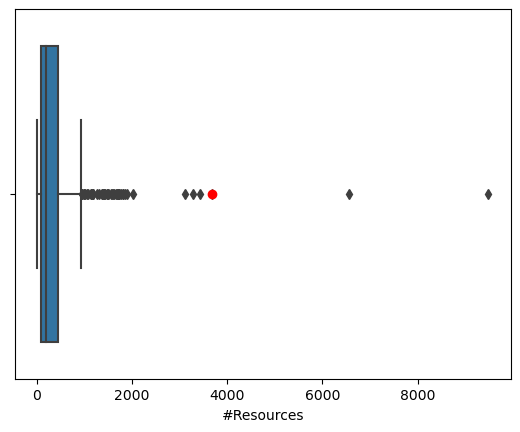

In [145]:
box = sns.boxplot(x=result['#Resources'])
box.plot(3670, 0, 'ro')
#sns.stripplot(x = result['#Statements'], color = 'black', alpha = 0.3, data = result)
plt.show()

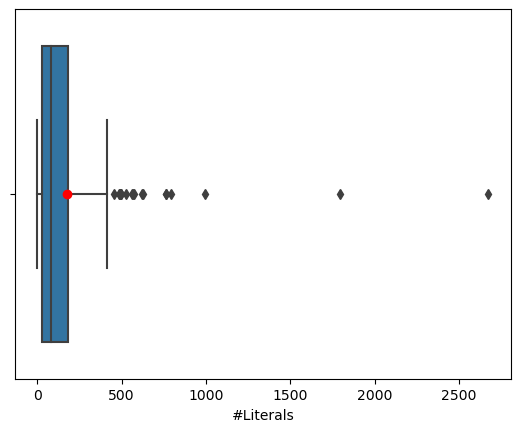

In [147]:
box = sns.boxplot(x=result['#Literals'])
box.plot(178, 0, 'ro')
#sns.stripplot(x = result['#Statements'], color = 'black', alpha = 0.3, data = result)
plt.show()